In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sympy import *
import math
np.set_printoptions(suppress=True)  

t1, t2, t3, t4, t5, t6, t7 = symbols("t1 t2 t3 t4 t5 t6 t7")

In [3]:
theta1, theta2, theta3, theta4, theta5, theta6, theta7 = symbols('theta1 theta2 theta3 theta4 theta5 theta6 theta7')

**1.**

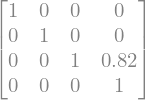

In [4]:

init_printing() 

def transform_matrix_x(alpha):
     transformation = Matrix([[1, 0, 0, 0],
                              [0, cos(alpha), -sin(alpha), 0],
                              [0, sin(alpha), cos(alpha), 0],
                              [0, 0, 0, 1]])
     return transformation

def transform_matrix_z(theta, transform=0): 
     transformation = Matrix([[cos(theta), -sin(theta), 0, 0],
                              [sin(theta), cos(theta), 0, 0],
                              [0, 0, 1, transform],
                              [0, 0, 0, 1]])
     return transformation

ninety_deg = pi/2
t1 = eye(4) * transform_matrix_z(theta1, 0) 
t2 = transform_matrix_x(ninety_deg) * transform_matrix_z(theta2, 0) 
t3 = transform_matrix_x(-ninety_deg) * transform_matrix_z(theta3, 0.42) 
t4 = transform_matrix_x(-ninety_deg) * transform_matrix_z(theta4, 0)
t5 = transform_matrix_x(ninety_deg) * transform_matrix_z(theta5, 0.4) 
t6 = transform_matrix_x(ninety_deg) * transform_matrix_z(theta6, 0) 
t7 = transform_matrix_x(-ninety_deg) * transform_matrix_z(theta7, 0) 

T_map = t1*t2*t3*t4*t5*t6*t7
zero_angles = {theta1: 0, theta2: 0, theta3: 0, theta4: 0, theta5: 0, theta6: 0, theta7: 0}
ninety_angles = {theta1: ninety_deg, theta2: ninety_deg, theta3: ninety_deg, theta4: ninety_deg, theta5: ninety_deg, theta6: ninety_deg, theta7: ninety_deg}

T_map_zero = T_map.subs(zero_angles)
T_map_zero


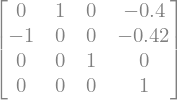

In [5]:
T_map_ninety = T_map.subs(ninety_angles)
T_map_ninety

**2.**

In [6]:
Y = Matrix([theta1, theta2, theta3, theta4, theta5, theta6, theta7])
end_effector_pos = T_map[:3, 3]
jacobian_matrix = end_effector_pos.jacobian(Y)
print(jacobian_matrix.shape)

(3, 7)


Rank of J(0): 1


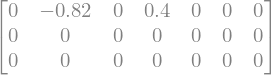

In [7]:
jacobian_zero = jacobian_matrix.subs(zero_angles)
rank_at_zero = jacobian_zero.rank()
print("Rank of J(0):", rank_at_zero)
jacobian_zero

There is 1 possible direction of instantaneous motion of the end effector

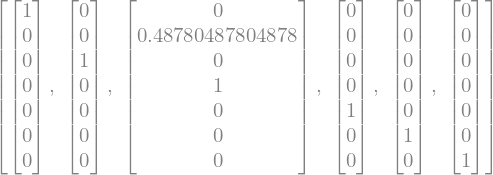

In [54]:
nullspace = jacobian_zero.nullspace()
nullspace

Given $\theta_{0}...\theta_{7} = 0, (\dot{\theta_{0}}...\dot{\theta_{7}}) = \alpha(1, 0.4878, 1, 1, 1, 1, 1)$, the end effector velocity will be 0. 

**3**

Joint Angles at Convergence:
{theta1: 0.5478074248744764, theta2: -0.42267998569285603, theta3: 0.3758702186861629, theta4: 1.1324604543876053, theta5: 1.0, theta6: 1.0, theta7: 1.0}


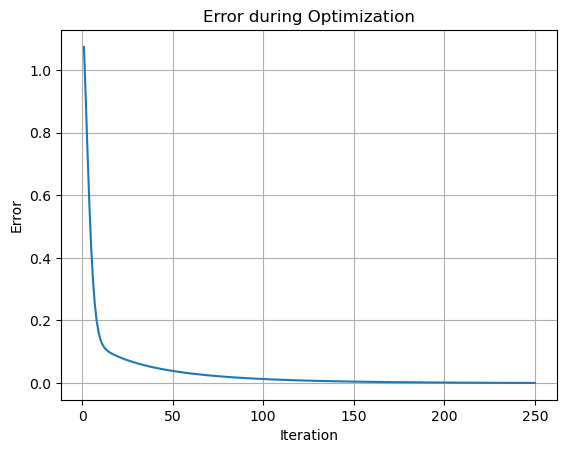

In [58]:
current_angles = {theta1: 1, theta2: 1, theta3: 1, theta4: 1, theta5: 1, theta6: 1, theta7: 1}
alpha = 0.5
errors = []
iterations = []
desired_position = np.array([[0.4], [0.4], [0.4]])
num_iters = 250
for i in range(num_iters):
    current_pos = np.array(T_map[:3, 3].subs(current_angles)).astype(np.float64)
    error = desired_position - current_pos
    current_gradient = np.array(jacobian_matrix.subs(current_angles)).astype(np.float64).T.dot(error)
    current_angles = {theta: theta_value + (alpha * current_gradient[j][0]) for j, (theta, theta_value) in enumerate(current_angles.items())}
    errors.append(np.linalg.norm(error))
    iterations.append(len(errors))


print("Joint Angles at Convergence:")
print(current_angles)

plt.plot(iterations, errors, linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error during Optimization')
plt.grid(True)
plt.show()